## first let's import all the necessary libraries 

In [54]:
from configs import *
from math import sqrt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn import preprocessing

## let'e us see how our datasets look like

In [55]:
adult_data = pd.read_excel("adult.xlsx")
adult_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# let check the overview of our datasets like null value, how many objects, integer we have.

In [56]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2   77516           32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4   13              32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10  2174            32560 non-null  int64 
 11  0               32560 non-null  int64 
 12  40              32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### As we see from the info method we have no null values in our dataset and we have 6 column interger data type and 9 objects 

In [57]:
adult_data.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## let's use some proper column name which given in our assignment documents for the comfort to proceed.

In [58]:
adult_data.columns = ['Age','work_class','len','Education','Edu_number','Marital_status','Jobs_status','R/ship','Race',
                      'Sex', 'Capt_gain','Capt_loss','Work_hr/week','Native_ctry','Avg_Income']
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [59]:
adult_data.to_csv('adult.csv',index=False)
adult_data = pd.read_csv('adult.csv')

In [60]:
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [61]:
#let check null value
adult_data.isna().sum()

Age               0
work_class        0
len               0
Education         0
Edu_number        0
Marital_status    0
Jobs_status       0
R/ship            0
Race              0
Sex               0
Capt_gain         0
Capt_loss         0
Work_hr/week      0
Native_ctry       0
Avg_Income        0
dtype: int64

## as we already saw from the info method it have no null values. 
# Analysis of Object
let us analsis the objects column and the outliers also and fix it with the proper values
  - special character :- replace with the most repeated values
  - outliers :- droping the outliers 

In [62]:
adult_data['work_class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: work_class, dtype: int64

### From the above cell of we understood the without pay had 14 values and never worked had 7 values which are very very small comparing with others , it will be the outliers of our data so let's drop it.  And we will replace the special character '?' also with most repeated values. 

In [63]:
indeces =  adult_data[(adult_data['work_class'] == " without-pay") | (adult_data['work_class'] == " Never-worked")].index
adult_data.drop(indeces , axis=0, inplace=True)

adult_data['work_class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: work_class, dtype: int64

In [64]:
adult_data['Education'].value_counts()

 HS-grad         10500
 Some-college     7289
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1174
 Assoc-acdm       1067
 10th              931
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [65]:
adult_data['Marital_status'].value_counts()

 Married-civ-spouse       14975
 Never-married            10677
 Divorced                  4442
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [66]:
indeces =  adult_data[(adult_data['work_class'] == " Without-pay") | 
                      (adult_data['work_class'] == " Never-worked") ].index
adult_data.drop(indeces , axis=0, inplace=True)
adult_data['work_class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
Name: work_class, dtype: int64

### Here there is "?" which have no difinition for us , so let replace it by the most repeated values which private as we are seeing it repeat 22k times.

In [67]:
adult_data.loc[adult_data["work_class"] == " ?", "work_class"] = " Private"
adult_data['work_class'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
Name: work_class, dtype: int64

In [68]:
adult_data['Jobs_status'].value_counts()

 Prof-specialty       4140
 Craft-repair         4098
 Exec-managerial      4066
 Adm-clerical         3766
 Sales                3650
 Other-service        3294
 Machine-op-inspct    2001
 ?                    1836
 Transport-moving     1596
 Handlers-cleaners    1369
 Farming-fishing       988
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Jobs_status, dtype: int64

### here also we have to replace "?" by most repeated value and we have to drop the outliers values of Armed forces which very very small by comparing with others.

In [69]:
adult_data.loc[adult_data["Jobs_status"] == " ?", "Jobs_status"] = " Prof-specialty"

adult_data['Jobs_status'].value_counts()

 Prof-specialty       5976
 Craft-repair         4098
 Exec-managerial      4066
 Adm-clerical         3766
 Sales                3650
 Other-service        3294
 Machine-op-inspct    2001
 Transport-moving     1596
 Handlers-cleaners    1369
 Farming-fishing       988
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Jobs_status, dtype: int64

In [70]:
indeces =  adult_data[(adult_data['Jobs_status'] == " Armed-Forces")].index
adult_data.drop(indeces , axis=0, inplace=True)

adult_data['Jobs_status'].value_counts()

 Prof-specialty       5976
 Craft-repair         4098
 Exec-managerial      4066
 Adm-clerical         3766
 Sales                3650
 Other-service        3294
 Machine-op-inspct    2001
 Transport-moving     1596
 Handlers-cleaners    1369
 Farming-fishing       988
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: Jobs_status, dtype: int64

In [71]:
adult_data['R/ship'].value_counts()

 Husband           13187
 Not-in-family      8299
 Own-child          5057
 Unmarried          3444
 Wife               1564
 Other-relative      979
Name: R/ship, dtype: int64

In [72]:
adult_data['Race'].value_counts()

 White                 27791
 Black                  3120
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      310
 Other                   271
Name: Race, dtype: int64

In [73]:
adult_data['Sex'].value_counts()

 Male      21766
 Female    10764
Name: Sex, dtype: int64

In [74]:
adult_data['Native_ctry'].value_counts()

 United-States                 29140
 Mexico                          643
 ?                               583
 Philippines                     197
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [75]:
adult_data.loc[adult_data["Native_ctry"] == " ?", "Native_ctry"] = " United-States"

adult_data['Native_ctry'].value_counts()

 United-States                 29723
 Mexico                          643
 Philippines                     197
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [76]:
indeces =  adult_data[(adult_data['Native_ctry'] == " Holand-Netherlands")].index
adult_data.drop(indeces , axis=0, inplace=True)
adult_data['Native_ctry'].value_counts()

 United-States                 29723
 Mexico                          643
 Philippines                     197
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

## Now we done with the object analysis
we replace the "?" in some of the column like
   - Native Country
   - work class
   - job status and
   - dropped some of the outliers in our datasets too

# let check once now our datasets info

In [77]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32529 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32529 non-null  int64 
 1   work_class      32529 non-null  object
 2   len             32529 non-null  int64 
 3   Education       32529 non-null  object
 4   Edu_number      32529 non-null  int64 
 5   Marital_status  32529 non-null  object
 6   Jobs_status     32529 non-null  object
 7   R/ship          32529 non-null  object
 8   Race            32529 non-null  object
 9   Sex             32529 non-null  object
 10  Capt_gain       32529 non-null  int64 
 11  Capt_loss       32529 non-null  int64 
 12  Work_hr/week    32529 non-null  int64 
 13  Native_ctry     32529 non-null  object
 14  Avg_Income      32529 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [78]:
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Integer datatypes Analysis
 now let see some of our integer data types and with graphics like histogram as the have no null value we saw it already and check the outliers also and fix it.

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'len'}>],
       [<AxesSubplot: title={'center': 'Edu_number'}>,
        <AxesSubplot: title={'center': 'Capt_gain'}>],
       [<AxesSubplot: title={'center': 'Capt_loss'}>,
        <AxesSubplot: title={'center': 'Work_hr/week'}>]], dtype=object)

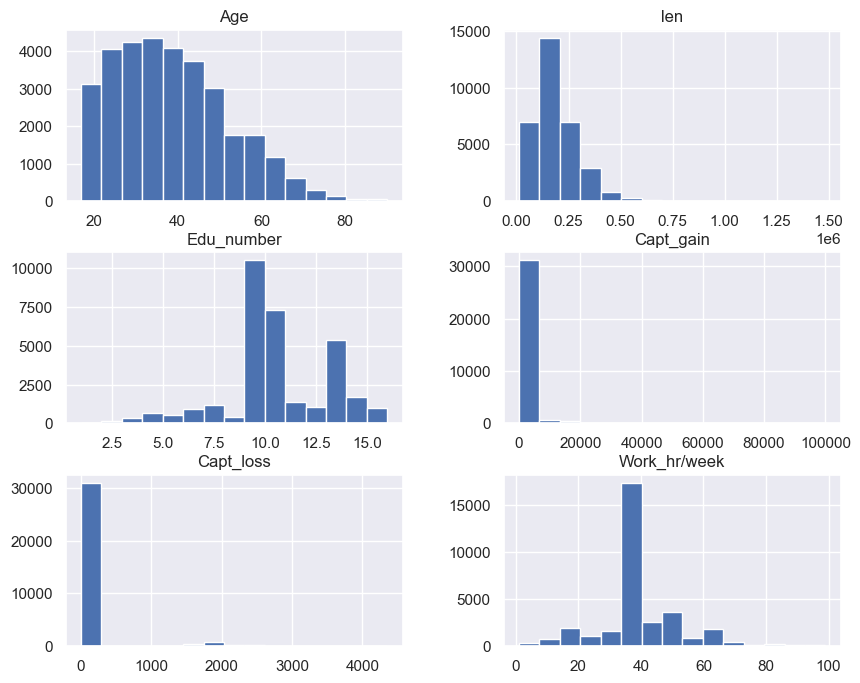

In [79]:
adult_data[['Age', 'len', 'Edu_number', 'Capt_gain',
                   'Capt_loss', 'Work_hr/week']].hist(bins=15, figsize=(10, 8))

In [80]:
def counts_outliers(col):
    median = np.median(col)
    print("Column Median: ", median)

    q1 = col.quantile(0.25) 
    q3 = col.quantile(0.75) 
    print("Q1:", q1)
    print("Q3:", q3)
    print("IQR:", q3 - q1)

    outlier_lower_limit = q1 - 1.5*(q3 - q1)
    outlier_upper_limit = q3 + 1.5*(q3 - q1)

    lower_limit_outliers = col[col < outlier_lower_limit].count()
    upper_limit_outliers = col[col > outlier_upper_limit].count()
    print("lower_limit_outliers:", lower_limit_outliers)
    print("upper_limit_outliers:", upper_limit_outliers)
    print("total outliers:", upper_limit_outliers + lower_limit_outliers)
    return lower_limit_outliers, upper_limit_outliers

In [81]:
col_not_scaled = adult_data['Age']
lower_limit_outliers, upper_limit_outliers = counts_outliers(col_not_scaled)

Column Median:  37.0
Q1: 28.0
Q3: 48.0
IQR: 20.0
lower_limit_outliers: 0
upper_limit_outliers: 143
total outliers: 143


In [82]:
col_not_scaled = adult_data['len']
lower_limit_outliers, upper_limit_outliers = counts_outliers(col_not_scaled)

Column Median:  178383.0
Q1: 117802.0
Q3: 237065.0
IQR: 119263.0
lower_limit_outliers: 0
upper_limit_outliers: 989
total outliers: 989


In [83]:
col_not_scaled = adult_data['Edu_number']
lower_limit_outliers, upper_limit_outliers = counts_outliers(col_not_scaled)

Column Median:  10.0
Q1: 9.0
Q3: 12.0
IQR: 3.0
lower_limit_outliers: 1196
upper_limit_outliers: 0
total outliers: 1196


# as we see there is some more outliers we we have to fix it.

In [84]:
def log_scale_outliers(data, list_of_cols, method='box-cox'):
    pt = preprocessing.PowerTransformer(method=method, standardize=False)
    log_scale = pt.fit_transform(data[list_of_cols])

    log_scale = pd.DataFrame(log_scale, columns=list_of_cols)


    return log_scale

In [85]:
log_scale = log_scale_outliers(adult_data, ['Age', 'len', 'Edu_number'], 'box-cox')
lower_limit_outliers, upper_limit_outliers = counts_outliers(log_scale['Age'])

Column Median:  5.036242029685632
Q1: 4.5243648128013545
Q3: 5.537360106281799
IQR: 1.0129952934804445
lower_limit_outliers: 0
upper_limit_outliers: 0
total outliers: 0


In [86]:
# now we fixed the outliers and as we see it is values are 0

In [87]:
lower_limit_outliers, upper_limit_outliers = counts_outliers(log_scale['len'])

Column Median:  377.69505676040785
Q1: 316.9859409228875
Q3: 425.84711833491747
IQR: 108.86117741202997
lower_limit_outliers: 58
upper_limit_outliers: 317
total outliers: 375


In [88]:
lower_limit_outliers, upper_limit_outliers = counts_outliers(log_scale['Edu_number'])

Column Median:  14.839291126277109
Q1: 12.826855817141226
Q3: 19.050895860422493
IQR: 6.224040043281267
lower_limit_outliers: 552
upper_limit_outliers: 0
total outliers: 552


In [89]:
adult_data[['Age', 'len', 'Edu_number']] = log_scale[['Age', 'len', 'Edu_number']]
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
0,5.618046,Self-emp-not-inc,273.795914,Bachelors,21.242538,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,5.086542,Private,409.172178,HS-grad,12.826856,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,5.734221,Private,424.066097,11th,9.013001,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,4.524365,Private,494.791712,Bachelors,21.242538,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,5.036242,Private,459.949147,Masters,23.487233,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Modeling of our datasets

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.metrics import  confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
%matplotlib inline

In [91]:
# adult_data = pd.read_csv("adult.csv")
# adult_data.head()

In [92]:
le = preprocessing.LabelEncoder()
Avg_Income = le.fit_transform(adult_data['Avg_Income'])
Avg_Income[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [93]:
adult_data['Avg_Income'] = Avg_Income

In [94]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32529 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32498 non-null  float64
 1   work_class      32529 non-null  object 
 2   len             32498 non-null  float64
 3   Education       32529 non-null  object 
 4   Edu_number      32498 non-null  float64
 5   Marital_status  32529 non-null  object 
 6   Jobs_status     32529 non-null  object 
 7   R/ship          32529 non-null  object 
 8   Race            32529 non-null  object 
 9   Sex             32529 non-null  object 
 10  Capt_gain       32529 non-null  int64  
 11  Capt_loss       32529 non-null  int64  
 12  Work_hr/week    32529 non-null  int64  
 13  Native_ctry     32529 non-null  object 
 14  Avg_Income      32529 non-null  int32  
dtypes: float64(3), int32(1), int64(3), object(8)
memory usage: 3.8+ MB


In [95]:
adult_data = adult_data.sample(frac = 1)
  
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
7940,5.618046,Private,301.611844,Assoc-voc,12.826856,Divorced,Other-service,Not-in-family,White,Male,0,0,32,United-States,0
18956,4.251802,Private,428.165879,HS-grad,1.129633,Married-civ-spouse,Sales,Wife,White,Female,0,0,20,United-States,0
5727,4.101169,Local-gov,316.971158,Prof-school,14.839291,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
11339,5.618046,Private,443.174411,5th-6th,12.826856,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Mexico,0
21099,3.938782,Private,518.721825,Bachelors,12.826856,Never-married,Prof-specialty,Own-child,White,Female,0,0,20,United-States,0


In [96]:
adult_data['Avg_Income'].value_counts()

0    24689
1     7840
Name: Avg_Income, dtype: int64

In [97]:
adult_data.isna().sum()

Age               31
work_class         0
len               31
Education          0
Edu_number        31
Marital_status     0
Jobs_status        0
R/ship             0
Race               0
Sex                0
Capt_gain          0
Capt_loss          0
Work_hr/week       0
Native_ctry        0
Avg_Income         0
dtype: int64

In [98]:
len(adult_data['len'])

32529

In [99]:
len(adult_data)

32529

In [100]:
adult_data['Age'] = adult_data['Age'].fillna(adult_data['Age'].median())
adult_data['len'] = adult_data['len'].fillna(adult_data['len'].median())
adult_data['Edu_number'] = adult_data['Edu_number'].fillna(adult_data['Edu_number'].median())
adult_data.isna().sum()

Age               0
work_class        0
len               0
Education         0
Edu_number        0
Marital_status    0
Jobs_status       0
R/ship            0
Race              0
Sex               0
Capt_gain         0
Capt_loss         0
Work_hr/week      0
Native_ctry       0
Avg_Income        0
dtype: int64

In [101]:
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
7940,5.618046,Private,301.611844,Assoc-voc,12.826856,Divorced,Other-service,Not-in-family,White,Male,0,0,32,United-States,0
18956,4.251802,Private,428.165879,HS-grad,1.129633,Married-civ-spouse,Sales,Wife,White,Female,0,0,20,United-States,0
5727,4.101169,Local-gov,316.971158,Prof-school,14.839291,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
11339,5.618046,Private,443.174411,5th-6th,12.826856,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Mexico,0
21099,3.938782,Private,518.721825,Bachelors,12.826856,Never-married,Prof-specialty,Own-child,White,Female,0,0,20,United-States,0


In [103]:
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
7940,5.618046,Private,301.611844,Assoc-voc,12.826856,Divorced,Other-service,Not-in-family,White,Male,0,0,32,United-States,0
18956,4.251802,Private,428.165879,HS-grad,1.129633,Married-civ-spouse,Sales,Wife,White,Female,0,0,20,United-States,0
5727,4.101169,Local-gov,316.971158,Prof-school,14.839291,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
11339,5.618046,Private,443.174411,5th-6th,12.826856,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Mexico,0
21099,3.938782,Private,518.721825,Bachelors,12.826856,Never-married,Prof-specialty,Own-child,White,Female,0,0,20,United-States,0


In [104]:
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
7940,5.618046,Private,301.611844,Assoc-voc,12.826856,Divorced,Other-service,Not-in-family,White,Male,0,0,32,United-States,0
18956,4.251802,Private,428.165879,HS-grad,1.129633,Married-civ-spouse,Sales,Wife,White,Female,0,0,20,United-States,0
5727,4.101169,Local-gov,316.971158,Prof-school,14.839291,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
11339,5.618046,Private,443.174411,5th-6th,12.826856,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Mexico,0
21099,3.938782,Private,518.721825,Bachelors,12.826856,Never-married,Prof-specialty,Own-child,White,Female,0,0,20,United-States,0


In [105]:
def split_data(features_based, adult_data):
    split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
    for train_indeces, test_indeces in split.split(adult_data, adult_data[features_based]):
        train_data = adult_data.iloc[train_indeces]
        test_data = adult_data.iloc[test_indeces]

    return train_data, test_data

In [107]:
train_data, test_data = split_data("Avg_Income", adult_data)
adult_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
7940,5.618046,Private,301.611844,Assoc-voc,12.826856,Divorced,Other-service,Not-in-family,White,Male,0,0,32,United-States,0
18956,4.251802,Private,428.165879,HS-grad,1.129633,Married-civ-spouse,Sales,Wife,White,Female,0,0,20,United-States,0
5727,4.101169,Local-gov,316.971158,Prof-school,14.839291,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
11339,5.618046,Private,443.174411,5th-6th,12.826856,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Mexico,0
21099,3.938782,Private,518.721825,Bachelors,12.826856,Never-married,Prof-specialty,Own-child,White,Female,0,0,20,United-States,0


In [112]:
test_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry,Avg_Income
12327,6.052880,State-gov,345.638722,HS-grad,12.826856,Divorced,Other-service,Unmarried,White,Female,2036,0,20,United-States,0
31729,4.878298,Private,344.626095,Some-college,14.839291,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,1
20928,4.766489,Private,178.807558,Some-college,16.915322,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,40,United-States,1
29192,4.459396,Self-emp-not-inc,512.224670,HS-grad,14.839291,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0
13026,5.367291,Private,406.853025,Some-college,21.242538,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,46,United-States,0


In [113]:
y_train   = np.array(train_data['Avg_Income'])
train_data.drop('Avg_Income', axis=1, inplace=True)

y_test   = np.array(test_data['Avg_Income'])
test_data.drop('Avg_Income', axis=1, inplace=True)

print(y_train.shape)
print(y_test.shape)

(26023,)
(6506,)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12636\499161848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('Avg_Income', axis=1, inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_12636\499161848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('Avg_Income', axis=1, inplace=True)


In [115]:
train_data.head()

,Age,work_class,len,Education,Edu_number,Marital_status,Jobs_status,R/ship,Race,Sex,Capt_gain,Capt_loss,Work_hr/week,Native_ctry
14540,5.135762,Private,287.254298,HS-grad,12.826856,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0,0,35,United-States
2090,4.101169,Private,172.265574,Bachelors,14.839291,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States
31384,5.495972,Private,376.534427,HS-grad,14.839291,Married-civ-spouse,Handlers-cleaners,Own-child,White,Male,0,0,35,United-States
10443,3.668059,Self-emp-inc,389.527567,Bachelors,7.224584,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
28528,4.392412,Private,324.051291,HS-grad,19.050896,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States


In [119]:
train_data.isna().sum()

Age               0
work_class        0
len               0
Education         0
Edu_number        0
Marital_status    0
Jobs_status       0
R/ship            0
Race              0
Sex               0
Capt_gain         0
Capt_loss         0
Work_hr/week      0
Native_ctry       0
dtype: int64

In [125]:
numerical_attr    = [ 'Age','len', 'Edu_number', 'Capt_gain', 'Capt_loss', 'Work_hr/week']

categorical_attr = ['work_class', 'Education', 'Marital_status', 'Jobs_status', 'R/ship', 'Race',
                   'Sex', 'Native_ctry']

full_pipeline = ColumnTransformer([
('cat_pipeline', OneHotEncoder(sparse=False), categorical_attr),
('num_pipeline', MinMaxScaler(), numerical_attr),
])

X = full_pipeline.fit_transform(train_data)

In [126]:
def predict_result(model, X,y_adult_data):
    predicted = model.predict(X_adult_data)
    print("Accuracy", round(f1_score(y_adult_data, predicted, average='micro')*100, 2))
    print("="*50)
    print(confusion_matrix(y_adult_data, predicted))
    return True

In [128]:
model = GaussianNB().fit(X, y_train)
print("================  Accuracy ======================")
predict_result(model,X , y_train)

================  Accuracy ======================
Accuracy 60.92
[[10015  9736]
 [  433  5839]]


True